# Analyse des intervalles v2 - HABIL

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
os.chdir("")

## Indication du fichier que l'on va utiliser

In [2]:
file_origine='BA_P_Result.xlsx'

Line A = échantillonnage de 1, 
Line B = échantillonnage de 1,
Line C = échantillonnage de 3,
Line D = échantillonnage de 1,
Line E = échantillonnage de 1,
Line H = échantillonnage de 1,
Line P = échantillonnage de 1.

## Lecture du fichier et intégration dans des Dataframes

In [3]:
#Lecture du fichier origine
xl=pd.ExcelFile(file_origine)
#Mise dans un dataframe
df_origine=xl.parse("Data")
#Affichage des 10 premières lignes du dataframe
df_origine.head(10)

,FR1_FECHA,NUM,FR1_FECHA.1,FR1_LINEA,FR1_TIPO,FR1_REGIST,FR1_ORDEN,FR1_TREN,FR1_CAUC1,FR1_CAUC2,...,Dep_Theo_C1_HP_AM,Dep_Reel_C1_HP_AM,Dep_Theo_C2_HP_PM,Dep_Reel_C2_HP_PM,Dep_Theo_C1_HV,Dep_Theo_C2_HV,Dep_Reel_C1_HV,Dep_Reel_C2_HV,Nb_incident_Interrup_C1,Nb_incident_Interrup_C2
0,2015-01-01,0,2015-01-01,P,F,1,1,1,V,,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-01,1,2015-01-01,P,F,2,2,1,V,,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-01,2,2015-01-01,P,F,3,3,2,V,,...,0,0,0,0,1,0,0,0,0,0
3,2015-01-01,3,2015-01-01,P,F,4,4,3,V,,...,0,0,0,0,1,0,0,0,0,0
4,2015-01-01,4,2015-01-01,P,F,5,5,4,V,,...,0,0,0,0,1,0,0,0,0,0
5,2015-01-01,5,2015-01-01,P,F,6,6,5,V,,...,0,0,0,0,1,0,0,0,0,0
6,2015-01-01,6,2015-01-01,P,F,7,7,6,V,,...,0,0,0,0,1,0,0,0,0,0
7,2015-01-01,7,2015-01-01,P,F,8,8,1,V,,...,0,0,0,0,1,0,0,0,0,0
8,2015-01-01,8,2015-01-01,P,F,9,9,2,,,...,0,0,0,0,1,0,0,0,0,0
9,2015-01-01,9,2015-01-01,P,F,10,10,3,V,,...,0,0,0,0,1,0,0,0,0,0


## Affichage pour rappel du type de données

In [4]:
df_origine.dtypes

FR1_FECHA                  datetime64[ns]
NUM                                 int64
FR1_FECHA.1                datetime64[ns]
FR1_LINEA                          object
FR1_TIPO                           object
FR1_REGIST                          int64
FR1_ORDEN                           int64
FR1_TREN                            int64
FR1_CAUC1                          object
FR1_CAUC2                          object
FR1_COCC1                           int64
FR1_COCC2                           int64
FR1_KM                             object
FR1_KMV                             int64
FR1_VIAC1                          object
FR1_VIAC2                          object
FR1_SALC1                          object
FR1_SALC2                          object
FR1_SCAUC2                         object
FR1_SCAUC1                         object
TIPO_DIA                           object
SAISON                             object
PERIODO                             int64
LINEA                             

## Indexation selon les dates et les types de jour

In [5]:
#On indexe le tableau origine selon la colonne qui contient des dates
df_new_index = df_origine.set_index(['FR1_FECHA', 'TIPO_DIA'], inplace=False)

df_new_index.head(10)

NUM FR1_FECHA.1 FR1_LINEA FR1_TIPO  FR1_REGIST  \
FR1_FECHA  TIPO_DIA                                                   
2015-01-01 DOMINGO     0  2015-01-01         P        F           1   
           DOMINGO     1  2015-01-01         P        F           2   
           DOMINGO     2  2015-01-01         P        F           3   
           DOMINGO     3  2015-01-01         P        F           4   
           DOMINGO     4  2015-01-01         P        F           5   
           DOMINGO     5  2015-01-01         P        F           6   
           DOMINGO     6  2015-01-01         P        F           7   
           DOMINGO     7  2015-01-01         P        F           8   
           DOMINGO     8  2015-01-01         P        F           9   
           DOMINGO     9  2015-01-01         P        F          10   

                     FR1_ORDEN  FR1_TREN FR1_CAUC1 FR1_CAUC2  FR1_COCC1  \
FR1_FECHA  TIPO_DIA                                                       
2015-01-01 DOMINGO           1         1         V                    1   
           DOMINGO           2         1         V                    1   
           DOMINGO           3         2         V                    1   
           DOMINGO           4         3         V                    1   
           DOMINGO           5         4         V                    1   
           DOMINGO           6         5         V                    1   
           DOMINGO           7         6         V                    1   
           DOMINGO           8         1         V                    1   
           DOMINGO           9         2                              1   
           DOMINGO          10         3         V                    1   

                              ...            Dep_Theo_C1_HP_AM  \
FR1_FECHA  TIPO_DIA           ...                                
2015-01-01 DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   

                    Dep_Reel_C1_HP_AM  Dep_Theo_C2_HP_PM Dep_Reel_C2_HP_PM  \
FR1_FECHA  TIPO_DIA                                                          
2015-01-01 DOMINGO                  0                  0                 0   
           DOMINGO                  0                  0                 0   
           DOMINGO                  0                  0                 0   
           DOMINGO                  0                  0                 0   
           DOMINGO                  0                  0                 0   
           DOMINGO                  0                  0                 0   
           DOMINGO                  0                  0                 0   
           DOMINGO                  0                  0                 0   
           DOMINGO                  0                  0                 0   
           DOMINGO                  0                  0                 0   

                    Dep_Theo_C1_HV Dep_Theo_C2_HV Dep_Reel_C1_HV  \
FR1_FECHA  TIPO_DIA                                                
2015-01-01 DOMINGO               0              0              0   
           DOMINGO               0              0              0   
           DOMINGO               1              0              0   
           DOMINGO               1              0              0   
           DOMINGO               1              0              0   
           DOMINGO               1              0            

In [6]:
df_habil = df_new_index.xs(('HABIL'), level=1)
df_sabado = df_new_index.xs(('SABADO'), level=1)
df_domingo = df_new_index.xs(('DOMINGO'), level=1)

df_habil.head(10)

,NUM,FR1_FECHA.1,FR1_LINEA,FR1_TIPO,FR1_REGIST,FR1_ORDEN,FR1_TREN,FR1_CAUC1,FR1_CAUC2,FR1_COCC1,...,Dep_Theo_C1_HP_AM,Dep_Reel_C1_HP_AM,Dep_Theo_C2_HP_PM,Dep_Reel_C2_HP_PM,Dep_Theo_C1_HV,Dep_Theo_C2_HV,Dep_Reel_C1_HV,Dep_Reel_C2_HV,Nb_incident_Interrup_C1,Nb_incident_Interrup_C2
FR1_FECHA,,,,,,,,,,,,,,,,,,,,,
2015-01-05,386,2015-01-05,P,H,1,1,1,,,1,...,0,0,0,0,0,0,0,0,0,0
2015-01-05,387,2015-01-05,P,H,2,2,1,,,1,...,0,0,0,0,0,0,1,0,0,0
2015-01-05,388,2015-01-05,P,H,3,3,2,,,1,...,0,0,0,0,1,0,1,0,0,0
2015-01-05,389,2015-01-05,P,H,4,4,3,CD,,1,...,0,0,0,0,1,0,0,0,0,0
2015-01-05,390,2015-01-05,P,H,5,5,4,,,1,...,0,0,0,0,1,0,1,0,0,0
2015-01-05,391,2015-01-05,P,H,6,6,5,,,1,...,0,0,0,0,1,0,1,0,0,0
2015-01-05,392,2015-01-05,P,H,7,7,6,FC,,1,...,0,0,0,0,1,0,0,0,0,0
2015-01-05,393,2015-01-05,P,H,8,8,7,,,1,...,0,0,0,0,1,0,1,0,0,0
2015-01-05,394,2015-01-05,P,H,9,9,8,FC,,1,...,0,0,0,0,1,0,0,0,0,0


## Calcul de l'indice du KPI Interval par jour - HABIL

In [7]:
#Création du DataFrame de résultat
df_temp=pd.DataFrame()

#Nombre d'interval excédentaire
df_temp.loc[:,('Count_Interval_Exc_C1')] = df_habil.loc[:,('Interval_Exc_C1')].resample('D').sum()
df_temp.loc[:,('Count_Interval_Exc_C2')] = 0#df_habil.loc[:,('Interval_Exc_C2')].resample('D').sum()

#On transforme au format interval de temps
df_habil.loc[:,('INT_C1')] = pd.to_timedelta(df_habil.loc[:,('INT_C1')])
df_habil.loc[:,('INT_C2')] = pd.to_timedelta(df_habil.loc[:,('INT_C2')])

#Nombre d'interval theo
df_habil.loc[:,('INT_C1_count')] = np.where(df_habil.loc[:,('INT_C1')]!=datetime.timedelta(seconds=1),1,0)
df_habil.loc[:,('INT_C2_count')] = 0#np.where(df_habil.loc[:,('INT_C2')]!=datetime.timedelta(seconds=1),1,0)
df_temp.loc[:,('Count_Interval_Theo_C1')] = df_habil.loc[:,('INT_C1_count')].resample('D').sum()
df_temp.loc[:,('Count_Interval_Theo_C2')] = 0#df_habil.loc[:,('INT_C2_count')].resample('D').sum()

#Calcul de l'indice du KPI interval
df_temp.loc[:,('Indice_Interval')] = (df_temp.loc[:,('Count_Interval_Exc_C1')] + df_temp.loc[:,('Count_Interval_Exc_C2')]) / (df_temp.loc[:,('Count_Interval_Theo_C1')] + df_temp.loc[:,('Count_Interval_Theo_C2')])

#Calcul du KPI interval
#UP_Interval = 5 * (df_temp['Count_Interval_Exc_C1'] + df_temp['Count_Interval_Exc_C2']) - (0.03 * (df_temp['Count_Interval_Theo_C1'] + df_temp['Count_Interval_Theo_C2']))
#df_temp['UP_Interval'] = np.where(df_temp['Indice_Interval']>0.03,UP_Interval,0)

#df_result['UP_Interval'] = df_temp['UP_Interval'].resample('M').sum()

df_temp.head(10)

C:\Users\SA237250\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Count_Interval_Exc_C1,Count_Interval_Exc_C2,Count_Interval_Theo_C1,Count_Interval_Theo_C2,Indice_Interval
FR1_FECHA,,,,,
2015-01-05,32,0,129,0,0.248062
2015-01-06,39,0,129,0,0.302326
2015-01-07,34,0,129,0,0.263566
2015-01-08,37,0,129,0,0.286822
2015-01-09,52,0,129,0,0.403101
2015-01-10,0,0,0,0,NaN
2015-01-11,0,0,0,0,NaN
2015-01-12,37,0,129,0,0.286822
2015-01-13,16,0,129,0,0.124031


In [8]:
#Somme du nombre d'intervalles excédentaires
a = df_temp['Count_Interval_Exc_C1'] + df_temp['Count_Interval_Exc_C2']

print(a.sum())

21488


## Mettre sur la même base le nombre d'intervale théorique (100)

In [9]:
df_temp['Count_Interval_Exc'] = (df_temp['Count_Interval_Exc_C1'] + df_temp['Count_Interval_Exc_C2']) * 100 / (df_temp['Count_Interval_Theo_C1'])# + df_temp['Count_Interval_Theo_C2'])

df_temp['Count_Interval_Theo'] = 100

df_temp.head(10)

,Count_Interval_Exc_C1,Count_Interval_Exc_C2,Count_Interval_Theo_C1,Count_Interval_Theo_C2,Indice_Interval,Count_Interval_Exc,Count_Interval_Theo
FR1_FECHA,,,,,,,
2015-01-05,32,0,129,0,0.248062,24.806202,100
2015-01-06,39,0,129,0,0.302326,30.232558,100
2015-01-07,34,0,129,0,0.263566,26.356589,100
2015-01-08,37,0,129,0,0.286822,28.682171,100
2015-01-09,52,0,129,0,0.403101,40.310078,100
2015-01-10,0,0,0,0,NaN,NaN,100
2015-01-11,0,0,0,0,NaN,NaN,100
2015-01-12,37,0,129,0,0.286822,28.682171,100
2015-01-13,16,0,129,0,0.124031,12.403101,100


## Affichage des informations du nb d'interval

In [10]:
df_final = df_temp

df_final.dropna(subset=['Count_Interval_Exc'], inplace=True)

#Descriptif des interruptions C1
df_final['Indice_Interval'].describe()

count    760.000000
mean       0.219176
std        0.088463
min        0.000000
25%        0.155039
50%        0.209302
75%        0.279070
max        0.457364
Name: Indice_Interval, dtype: float64

## Création d'un jeu de donnée "Train" et d'un jeu de donnée "Test"

In [13]:
from sklearn.model_selection import train_test_split

X = df_final

X_train, X_test = train_test_split(X, test_size=0.20)

print(len(X_train), len(X_test))

608 152


## Model data by finding best fit distribution to data

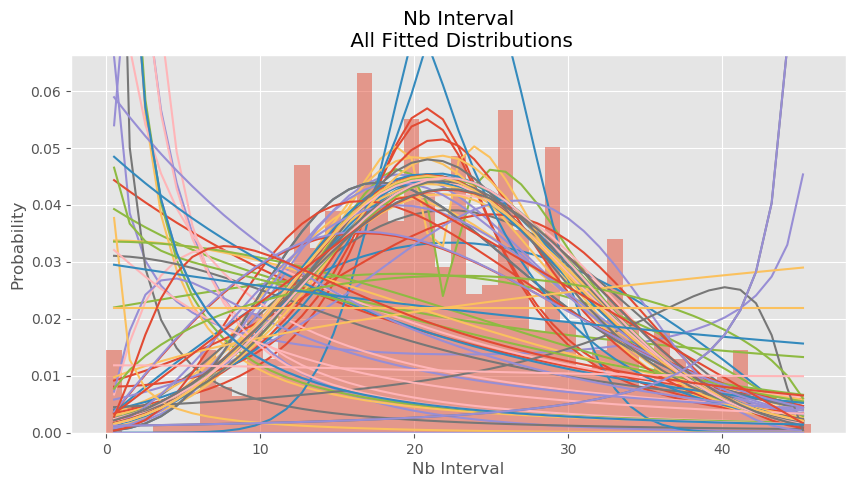

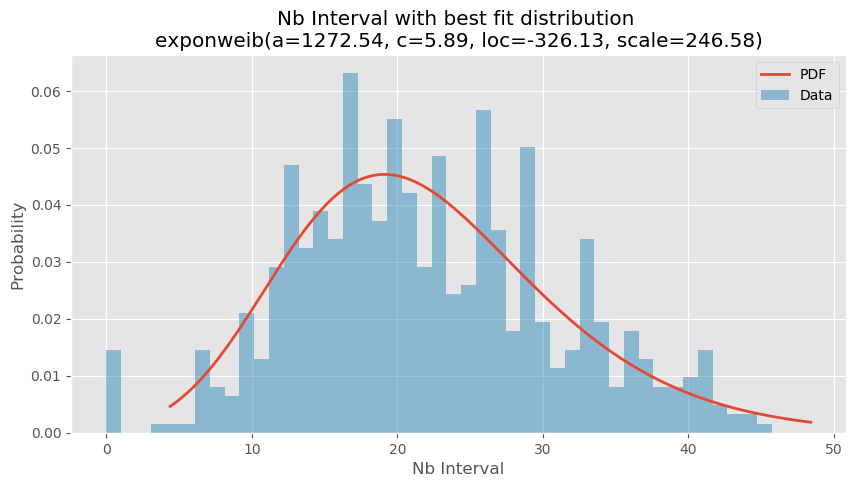

In [14]:
#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    sses = []
    
    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                sses.append([sse, distribution.name, params])
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    #Export en CSV
    df = pd.DataFrame(sses)
    filename = 'BA_' + df_origine.iloc[1,3] + '_Interval Habil_Distribution.csv'
    df.to_csv(filename, index=False, encoding='utf-8', sep=';', decimal=',')
    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Propbability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
#data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
#data_temp = df_final['Indice_Interval']
data = X_train['Count_Interval_Exc']
nb_pas = np.absolute(np.int(data.max() / 1))

# Plot for comparison
plt.figure(figsize=(10,5), dpi=100)
#plt.xticks(np.linspace(0, 24, 9))
#plt.yticks(np.linspace(0, 0.14, 8))
ax = data.plot(kind='hist', bins=nb_pas, density=True, alpha=0.5, color=plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax.set_xlabel(u'Nb Interval')
ax.set_ylabel('Probability')
plt.savefig('BA_' + df_origine.iloc[1,3] + '_Nb Interval Habil_Histo.png', dpi=200)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution(data, nb_pas, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Nb Interval\n All Fitted Distributions')
ax.set_xlabel(u'Nb Interval')
ax.set_ylabel('Probability')

#Enregistrement du graphique
plt.savefig('BA_' + df_origine.iloc[1,3] + '_Nb Interval Habil_All.png', dpi=200)

# Make PDF
pdf = make_pdf(best_dist, best_fir_paramms)

# Display
plt.figure(figsize=(10,5), dpi=100)
#plt.xticks(np.linspace(0, 24, 9))
#plt.yticks(np.linspace(0, 0.14, 9))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=nb_pas, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

#ax.set_ylim(dataYLim)
ax.set_title(u'Nb Interval with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Nb Interval')
ax.set_ylabel('Probability')

#Enregistrement du graphique
plt.savefig('BA_' + df_origine.iloc[1,3] + '_Nb Interval Habil_Best.png', dpi=200)

## Evaluation distribution fit

In [205]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

y_true = X_test['Count_Interval_Exc']
y_pred = st.alpha.rvs(17.44048882908136, -128.03199086489377, 2606.567983229257, size=len(y_true))
y_pred = np.where(y_pred<3,0,y_pred)

#Best possible score is 1.0, lower values are worse.
print('EVS %f' % explained_variance_score(y_true, y_pred))

#MAE output is non-negative floating point. The best value is 0.0.
print('MAE %f' % mean_absolute_error(y_true, y_pred))

#A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
print('*MSE %f' % mean_squared_error(y_true, y_pred))

print('*RMSE %f' % np.sqrt(mean_squared_error(y_true, y_pred)))

#A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
print('MSLE %f' % mean_squared_log_error(y_true, y_pred))

#A positive floating point value (the best value is 0.0).
print('*MedAE %f' % median_absolute_error(y_true, y_pred))

#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
#A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0
print('R2score %f' % r2_score(y_true, y_pred))

EVS -0.910377
MAE 10.231340
*MSE 174.586442
*RMSE 13.213116
MSLE 0.890484
*MedAE 8.242286
R2score -0.918371


In [133]:
print('Sum real data = %f' % y_true.sum())
print('Sum forecast data = %f' % y_pred.sum())

Sum real data = 3303.875969
Sum forecast data = 3047.804592


Text(0,0.5,'Probability')

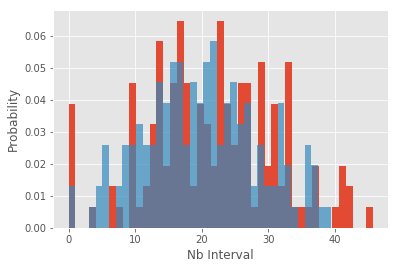

In [134]:
hist = y_true.hist(bins=np.int(y_true.max()/1), density=True)
ax = hist.hist(np.array(y_pred), bins=np.int(y_pred.max()/1), density=True, alpha=0.7)

hist.set_xlabel(u'Nb Interval')
hist.set_ylabel('Probability')

Text(0,0.5,'Probability')

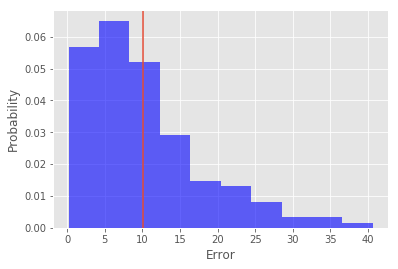

In [135]:
essai = np.abs(y_true - y_pred)
hist = essai.hist(density=True, color='Blue', alpha=0.6)
hist.axvline(np.mean(np.abs(essai)))
hist.set_xlabel(u'Error')
hist.set_ylabel('Probability')

## Evaluation distribution fit

In [46]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

y_true = X_test['Count_Interval_Exc']
y_pred = st.exponweib.rvs(1272.5376393228285, 5.893408493642978, -326.134319758531, 246.57601689433585, size=len(y_true))
y_pred = np.where(y_pred<3,0,y_pred)

#Best possible score is 1.0, lower values are worse.
print('EVS %f' % explained_variance_score(y_true, y_pred))

#MAE output is non-negative floating point. The best value is 0.0.
print('MAE %f' % mean_absolute_error(y_true, y_pred))

#A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
print('*MSE %f' % mean_squared_error(y_true, y_pred))

print('*RMSE %f' % np.sqrt(mean_squared_error(y_true, y_pred)))

#A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
print('MSLE %f' % mean_squared_log_error(y_true, y_pred))

#A positive floating point value (the best value is 0.0).
print('*MedAE %f' % median_absolute_error(y_true, y_pred))

#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
#A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0
print('R2score %f' % r2_score(y_true, y_pred))

EVS -1.460463
MAE 10.588369
*MSE 180.378850
*RMSE 13.430519
MSLE 0.594709
*MedAE 8.309255
R2score -1.477852


In [47]:
print('Sum real data = %f' % y_true.sum())
print('Sum forecast data = %f' % y_pred.sum())

Sum real data = 3255.813953
Sum forecast data = 3426.828321


Text(0,0.5,'Probability')

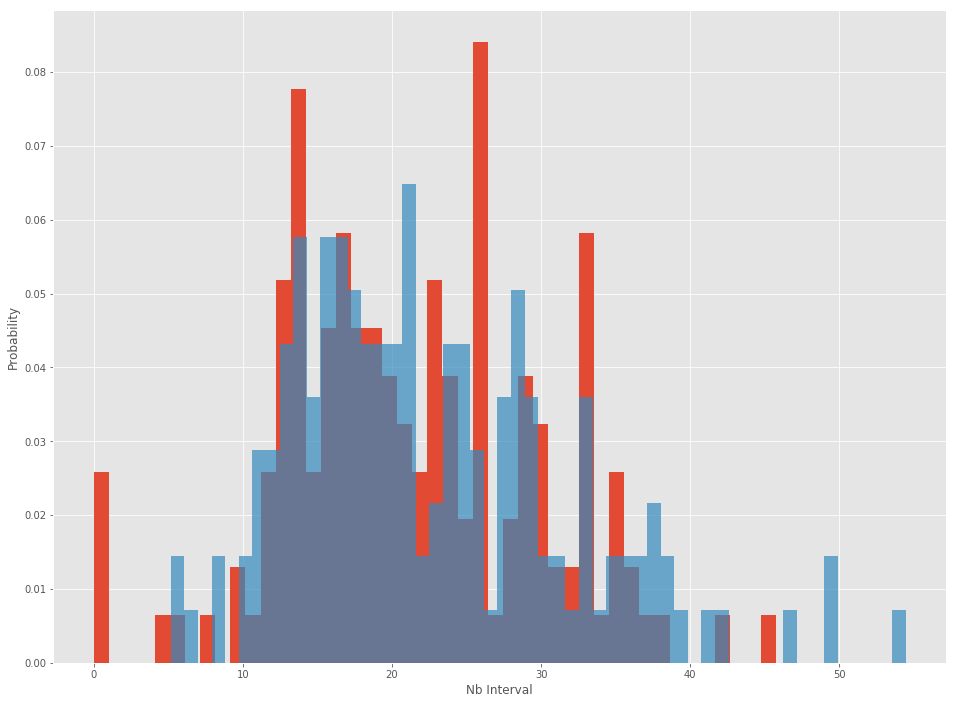

In [48]:
hist = y_true.hist(bins=np.int(y_true.max()/1), density=True)
ax = hist.hist(np.array(y_pred), bins=np.int(y_pred.max()/1), density=True, alpha=0.7)

hist.set_xlabel(u'Nb Interval')
hist.set_ylabel('Probability')

Text(0,0.5,'Probability')

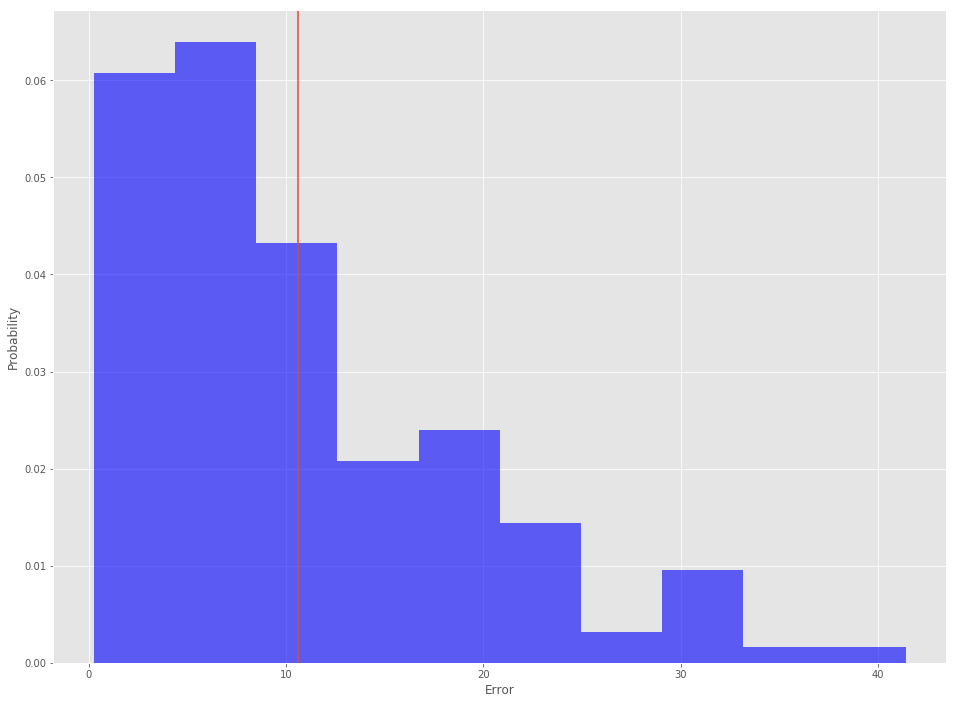

In [49]:
essai = np.abs(y_true - y_pred)
hist = essai.hist(density=True, color='Blue', alpha=0.6)
hist.axvline(np.mean(np.abs(essai)))
hist.set_xlabel(u'Error')
hist.set_ylabel('Probability')